In [1]:
from myData import *
#from Preprocess import *
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
X,y,_= get_data('diabetic_data.csv',labelEncode=False, skewness=False)
df = pd.concat([X,y], axis=1)
df.columns

raw data shape (101766, 50)
['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'medical_specialty', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
processed data shape: (69973, 42)


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [3]:
pd.set_option('display.max_columns', 50)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[50-60),2,1,1,8,Cardiology,77,6,33,0,0,0,8,None,None,Steady,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Yes
1,Caucasian,Female,[50-60),3,1,1,2,Surgery-Neuro,49,1,11,0,0,0,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,Caucasian,Female,[80-90),1,3,7,4,InternalMedicine,68,2,23,0,0,0,9,None,>7,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
3,Caucasian,Female,[80-90),1,1,7,3,InternalMedicine,46,0,20,0,0,0,9,None,>8,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,No
4,AfricanAmerican,Female,[30-40),1,1,7,5,InternalMedicine,49,0,5,0,0,0,3,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No


Text(0.5, 1.0, 'Race')

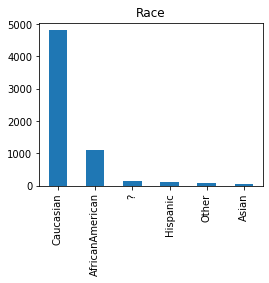

In [4]:
plt.rcParams['figure.figsize']= [4.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'race'].value_counts().plot(kind='bar')
plt.title('Race')

Text(0.5, 1.0, 'gender')

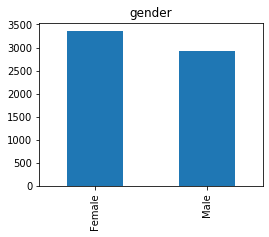

In [5]:
plt.rcParams['figure.figsize']= [4.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'gender'].value_counts().plot(kind='bar')
plt.title('gender')

Text(0.5, 1.0, 'Age')

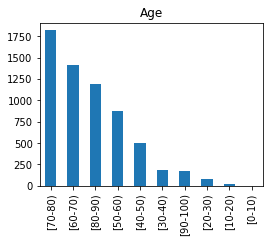

In [6]:
df.loc[df['readmitted'].isin(['1','Yes']),'age'].value_counts().plot(kind='bar')
plt.title("Age")

Text(0.5, 1.0, 'discharge_disposition_id')

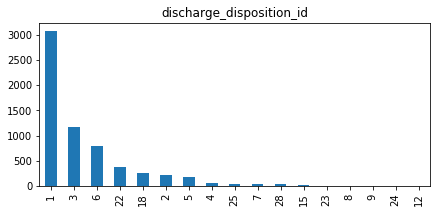

In [7]:
plt.rcParams['figure.figsize']= [7.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'discharge_disposition_id'].value_counts().plot(kind='bar')
plt.title("discharge_disposition_id")

Text(0.5, 1.0, 'admission_source_id')

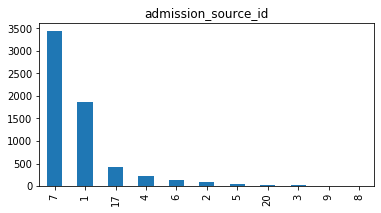

In [8]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'admission_source_id'].value_counts()[:25].plot(kind='bar')
plt.title("admission_source_id")

Text(0.5, 1.0, 'time_in_hospital')

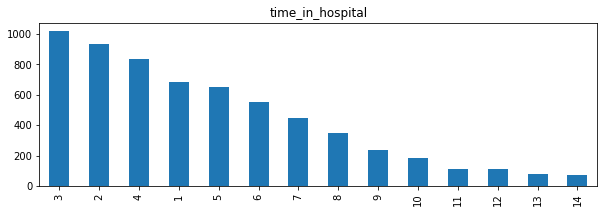

In [9]:
plt.rcParams['figure.figsize']= [10.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'time_in_hospital'].value_counts()[:25].plot(kind='bar')
plt.title("time_in_hospital")

Text(0.5, 1.0, 'medical_specialty')

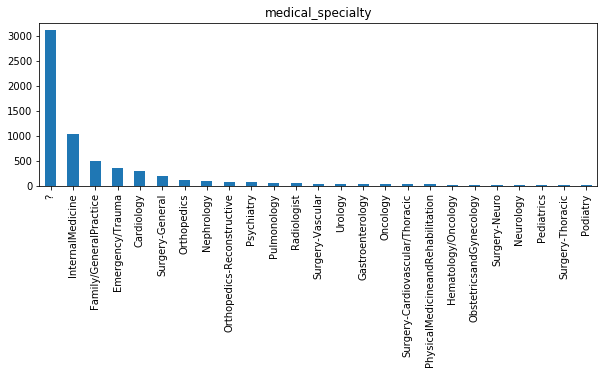

In [10]:
#plt.rcParams['figure.figsize']= [10.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'medical_specialty'].value_counts()[:25].plot(kind='bar')
plt.title("medical_specialty")

Text(0.5, 1.0, 'num_lab_procedures')

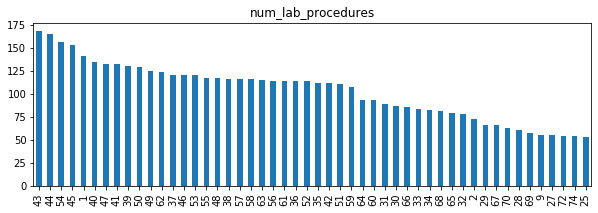

In [11]:
#plt.rcParams['figure.figsize']= [10.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'num_lab_procedures'].value_counts()[:50].plot(kind='bar')
plt.title("num_lab_procedures")

Text(0.5, 1.0, 'num_procedures')

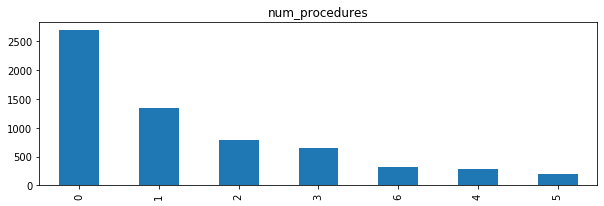

In [12]:
#plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'num_procedures'].value_counts().plot(kind='bar')
plt.title("num_procedures")

Text(0.5, 1.0, 'num_medications')

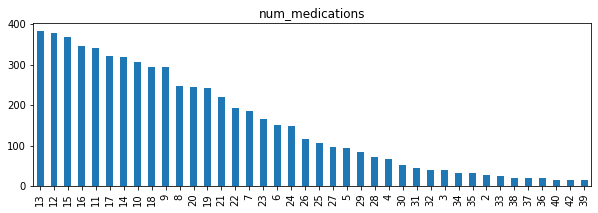

In [13]:
plt.rcParams['figure.figsize']= [10.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'num_medications'].value_counts()[:40].plot(kind='bar')
plt.title("num_medications")

Text(0.5, 1.0, 'number_emergency')

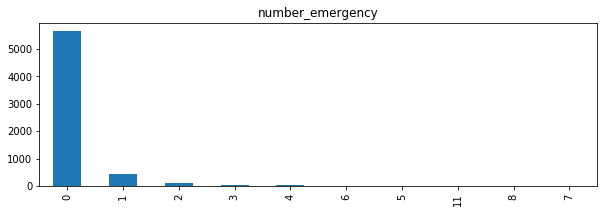

In [14]:
#plt.rcParams['figure.figsize']= [6.0, 4.0]
df.loc[df['readmitted'].isin(['1','Yes']),'number_emergency'].value_counts().plot(kind='bar')
plt.title("number_emergency")

Text(0.5, 1.0, 'number_inpatient')

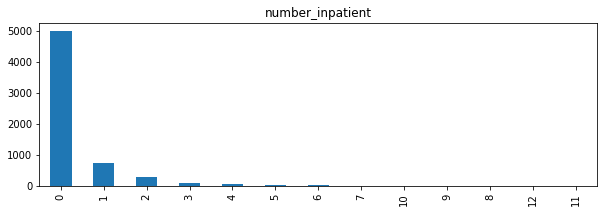

In [15]:
#plt.rcParams['figure.figsize']= [6.0, 4.0]
df.loc[df['readmitted'].isin(['1','Yes']),'number_inpatient'].value_counts().plot(kind='bar')
plt.title("number_inpatient")

Text(0.5, 1.0, 'number_outpatient')

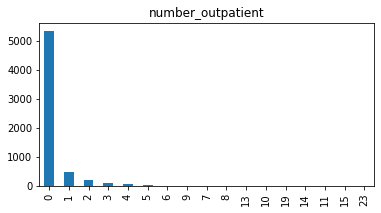

In [16]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'number_outpatient'].value_counts().plot(kind='bar')
plt.title("number_outpatient")

Text(0.5, 1.0, 'number_diagnoses')

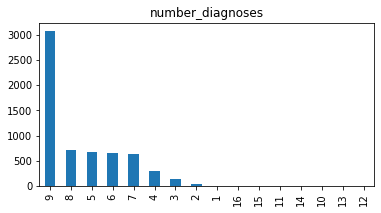

In [17]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'number_diagnoses'].value_counts().plot(kind='bar')
plt.title("number_diagnoses")

Text(0.5, 1.0, 'number_outpatient')

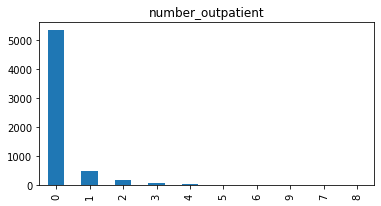

In [18]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'number_outpatient'].value_counts()[:10].plot(kind='bar')
plt.title("number_outpatient")

In [19]:
X,y, labl= get_data('diabetic_data.csv',labelEncode=True, skewness=True)

raw data shape (101766, 50)
['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'medical_specialty', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
processed data shape: (69973, 42)


In [20]:
if y.dtype=='object':
    y = y.apply(lambda x: int(x=='Yes'))

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, shuffle=False, test_size=0.2, random_state=0)

X_train, X_train_lr, y_train, y_train_lr = ms.train_test_split(
    X_train, y_train, test_size=0.5)

print(X_train.shape, X_train_lr.shape, X_test.shape)

(27989, 42) (27989, 42) (13995, 42)


In [21]:
plt.rcParams['figure.figsize']= [6.0, 5.0]

In [36]:
# Random Forest,  and + Logistic Regression

n_estimator = 20
rf = RandomForestClassifier(max_depth=5, max_features=4, n_estimators=n_estimator,n_jobs=-1, random_state=42)
rf_enc = OneHotEncoder(categories='auto')
rf_lm = LogisticRegression(solver='saga', max_iter=1000, C=0.01, random_state=42)
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))

rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)
auc_rf_lm = auc(fpr_rf_lm, tpr_rf_lm)

print(auc_rf, auc_rf_lm)

0.6326665920371886 0.6271489474871345


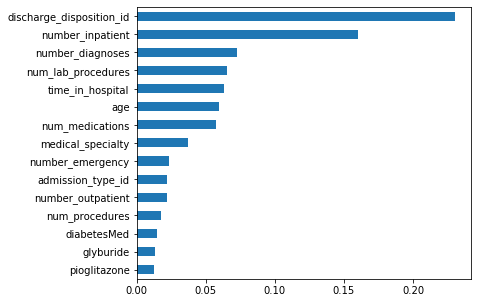

In [38]:
pd.Series(rf.feature_importances_, index=X_train.columns).sort_values()[-15:].plot(kind='barh')

In [34]:
# Gradient Boosting, and + Logistic Regression

n_estimator = 80
grd = GradientBoostingClassifier(n_estimators=n_estimator,random_state=42, learning_rate=0.1)
grd_enc = OneHotEncoder(categories='auto')
grd_lm = LogisticRegression(solver='saga', max_iter=1000, C=0.01, random_state=42)
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)
auc_grd_lm = auc(fpr_grd_lm, tpr_grd_lm)

y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)
auc_grd = auc(fpr_grd, tpr_grd)
print(auc_grd, auc_grd_lm)

0.6425367893193163 0.644656484487391


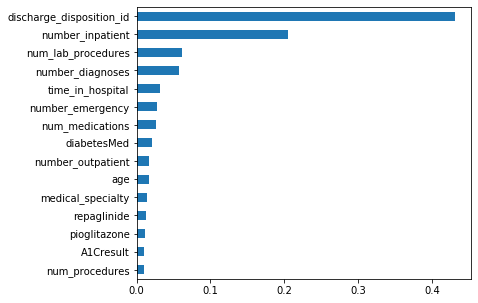

In [25]:
pd.Series(grd.feature_importances_, index=X_train.columns).sort_values()[-15:].plot(kind='barh')